<h1>모델 선택과 확장</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 교차검증을 통한 파라메터 튜닝

당뇨 데이터 셋

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True,as_frame=True)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=20)

KNN 회귀 모델

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
f = KNeighborsRegressor(n_neighbors=5) #n_neighbors: k값(knn)
f.fit(xtrain,ytrain)
print('train accuracy: ', f.score(xtrain,ytrain)) #accuracy가 사실은 R^2
print('test accuracy: ', f.score(xtest,ytest))

train accuracy:  0.5965805996455307
test accuracy:  0.3661395930387644


In [4]:
from sklearn.model_selection import cross_val_score  #교차검증
cv_score = cross_val_score(f,xtrain,ytrain,cv=5) #5 fold cross validation -> 5번 평가
print(cv_score)
print(cv_score.mean())

[0.33481701 0.24003059 0.38131323 0.51266514 0.33257977]
0.3602811485801669


파라메터에 따른 성능 변화

In [5]:
r2_train = []; r2_cv = []; r2_test = []
klist = np.arange(1,100)   # klist = [1,2,...,99]
for k in klist:  
  f = KNeighborsRegressor(n_neighbors=k)
  f.fit(xtrain,ytrain)
  r2_train.append( f.score(xtrain,ytrain) )
  r2_cv.append( cross_val_score(f,xtrain,ytrain,cv=5).mean() )
  r2_test.append( f.score(xtest,ytest) )

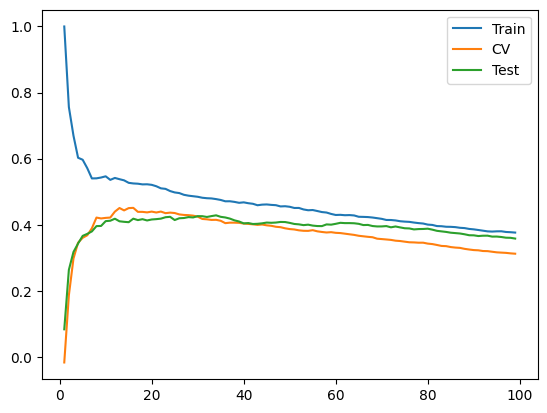

In [6]:
plt.plot(klist,r2_train,klist,r2_cv,klist,r2_test)
plt.legend(['Train','CV','Test'])

좀 더 간단한 파라메터 튜닝

In [7]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(1,100)}
f = GridSearchCV( KNeighborsRegressor(), params, cv=5 )
f.fit(xtrain,ytrain)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': array([ 1, 2..., 97, 98, 99])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,np.int64(16)


In [8]:
f.best_estimator_

,n_neighbors,np.int64(16)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
f.best_params_

{'n_neighbors': np.int64(16)}

In [10]:
f.best_score_

np.float64(0.4509426203809033)

In [11]:
ytest_hat = f.predict(xtest)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.5248524013184899 0.41817012296407885


# 규제화

당뇨 데이터셋

In [12]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True,as_frame=True)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.7,random_state=20)

일반 선형 회귀 모델

In [13]:
from sklearn.linear_model import LinearRegression
f = LinearRegression()
f.fit(xtrain,ytrain)
print( f.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[  29.36302912 -293.38780131  527.43617755  448.89980572   77.32547217
 -310.65107978 -486.03252566   80.8207681   364.97625482  -22.93089172]
0.5598555777677944 0.45804985756984384


Ridge Regression: linear + L2 regression

In [14]:
from sklearn.linear_model import Ridge 
f = Ridge(alpha=1) #error+ alpha*penalty
f.fit(xtrain,ytrain)
print( f.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[  32.24687058   -6.8291064   186.85973407  148.72270487    3.90106705
  -12.86000737 -100.16062959   74.6302326   146.45545123   71.4467023 ]
0.34507473866952654 0.3351710717404194


In [17]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':10**np.linspace(-5,5,21)} #alpha를 조절할 때 선형적으로 변형 안하고 보통 log스케일로 변화시킴. -5, -4.5, ...., 4.5, 5: 21개 
f = GridSearchCV( Ridge(), params )
f.fit(xtrain,ytrain)


,estimator,Ridge()
,param_grid,{'alpha': array([1.0000...00000000e+05])}
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.float64(0....2277660168379)


In [16]:
f.best_estimator_ #10^(-1.5)

,alpha,np.float64(0....2277660168379)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [18]:
print( f.best_estimator_.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[  29.1642703  -238.42761968  496.33950395  412.31367599 -102.60031295
 -157.11720183 -328.74655344  136.09350407  394.88341911    7.22866489]
0.5567587739193876 0.474110190338105


Lasso Regression

In [19]:
from sklearn.linear_model import Lasso #linear + L1
f = Lasso(alpha=1)
f.fit(xtrain,ytrain)
print( f.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[  0.          -0.         427.71368063 125.97486537  -0.
  -0.          -0.           0.         188.33135589   0.        ]
0.38823471523826725 0.3579913959532527


In [20]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':10**np.linspace(-5,5,21)}
f = GridSearchCV( Lasso(max_iter=10000), params )
f.fit(xtrain,ytrain)
f.best_estimator_

,alpha,np.float64(0.1)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,10000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [21]:
print( f.best_estimator_.coef_ )
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[   0.         -202.63165518  520.30843121  396.60377134   -0.
 -142.02373089 -414.11976468    0.          375.01045369    0.        ]
0.5542406333360963 0.47677075211768083


# 연습문제

1. 아래의 코드는 당뇨 데이터 셋을 분류문제로 변경한 것이다. 여기에 로지스틱 회귀 모델을 적용하여 분류 모델을 만들고자 한다. 로지스틱 회귀 모델에서 사용되는 sklearn.linear_model.LogisticRegression에는 C라는 파라메터가 있는데, 이 파라메터의 사용법을 검색을 통해 알아보시오.<br>
C의 값을 0.001, 0.01, 0.1, 1 으로 변경해가면서 교차검증을 수행하였을 때, 가장 성능이 좋은 C의 값은 얼마인가? 교차검증은 GridSearchCV를 통해 수행하고 필요한 파라메터 외에는 모두 기본값을 사용한다. 교차검증에는 훈련데이터만을 사용한다. 이때의 평가 데이터에서의 성능이 얼마인가?

In [22]:
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)
y = [ 'Neg' if y_numeric[i]<140 else 'Pos' for i in range(len(y_numeric)) ]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
f = GridSearchCV(LogisticRegression(),{'C':[0.001,0.01,0.1,1]})

In [24]:
f.fit(xtrain,ytrain)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [25]:
f.best_params_

{'C': 1}

In [26]:
f.score(xtest,ytest)

0.7966101694915254

In [25]:
f.score(xtrain,ytrain)

0.7018867924528301